In [1]:
from labo_instruments import SR830, KURIOS
import pandas as pd
import numpy as np
import pyvisa as visa
import time
import matplotlib.pyplot as plt
import os


🧪 Paquete labo-instruments cargado.
Clases disponibles, métodos y descripción breve:

📦 Osciloscopio Tektronix TDS1002B
   • config(self)
     ↪ Configura la escala vertical de los canales 1 y 2 y el tiempo horizontal por defecto.
   • get_channel(self, channel)
     ↪ Devuelve la configuración actual del canal especificado.
   • get_range(self, channel)
     ↪ Devuelve el rango de voltaje de la señal visible del canal especificado.
   • get_time(self)
     ↪ Devuelve la configuración horizontal del osciloscopio.
   • read_data(self, channel)
     ↪ Adquiere una forma de onda del canal especificado y la devuelve como arrays de tiempo y voltaje.
   • set_channel(self, channel, scale, zero=0)
     ↪ Configura la escala vertical y el offset de un canal.
   • set_time(self, scale, zero=0)
     ↪ Configura la escala horizontal (tiempo por división) y el desplazamiento.
   • unlock(self)
     ↪ Desbloquea el control manual del osciloscopio (libera el modo remoto).

📦 Multiplexor Agilent 3497

In [2]:
help(SR830)

Help on class SR830 in module labo_instruments.sr830:

class SR830(builtins.object)
 |  SR830(resource)
 |  
 |  Clase para el manejo amplificador Lockin SR830 usando PyVISA de interfaz
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |      Finaliza la conexión con el Lock-in SR830 y desbloquea el panel frontal.
 |      
 |      Side Effects:
 |          - Envía el comando "LOCL 0" para habilitar el control manual del equipo.
 |          - Cierra la conexión VISA.
 |  
 |  __init__(self, resource)
 |      Inicializa la conexión con el Lock-in Amplifier SR830 mediante PyVISA.
 |      
 |      Args:
 |          resource (str): Dirección del recurso VISA del instrumento (por ejemplo, "GPIB0::8::INSTR").
 |      
 |      Side Effects:
 |          - Bloquea el panel frontal del equipo para evitar interacción manual.
 |          - Obtiene la escala y constante de tiempo actuales del equipo.
 |  
 |  auto_scale(self)
 |      Ajusta automáticamente la escala del Lock-in para optimizar l

In [3]:
rm = visa.ResourceManager()
print(rm.list_resources())
lockin = SR830('GPIB0::8::INSTR')

('ASRL1::INSTR', 'ASRL2::INSTR', 'ASRL3::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR', 'GPIB0::8::INSTR')
Stanford_Research_Systems,SR830,s/n81296,ver1.07 



# Barrido de voltaje

In [ ]:
X = []
Y = []
R = []
T = []
V = []

for i in np.linspace(-1.5,1,200):
    lockin.set_aux_out(3,i)  
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)
    print(medicionXY)
    print(medicionRT)
    print('------------------')
    time.sleep(0.5)

    V.append(i)
    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])
    

Valor por debajo de threshold, bajo escala (r=9.84818e-12, oldscale=0.0002)
Valor por debajo de threshold, bajo escala (r=1.112e-11, oldscale=0.0001)
Valor por debajo de threshold, bajo escala (r=1.06191e-11, oldscale=5e-05)
Valor por debajo de threshold, bajo escala (r=1.04495e-11, oldscale=2e-05)
Valor por debajo de threshold, bajo escala (r=9.99029e-12, oldscale=1e-05)
Valor por debajo de threshold, bajo escala (r=5.46077e-12, oldscale=5e-06)
Valor por debajo de threshold, bajo escala (r=2.18427e-12, oldscale=2e-06)
Valor por debajo de threshold, bajo escala (r=1.09213e-12, oldscale=1e-06)
Valor por debajo de threshold, bajo escala (r=5.46067e-13, oldscale=5e-07)
Valor por debajo de threshold, bajo escala (r=2.18437e-13, oldscale=2e-07)
Valor por debajo de threshold, bajo escala (r=1.09219e-13, oldscale=1e-07)
Valor por debajo de threshold, bajo escala (r=5.46093e-14, oldscale=5e-08)
Valor por debajo de threshold, bajo escala (r=2.18437e-14, oldscale=2e-08)
Valor por debajo de thres

KeyboardInterrupt: 

In [93]:
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'V':V,
                     'R':R,
                     'T':T})

display(data)

,X,Y,V,R,T
0,4.001800e-11,-8.242350e-12,-1.500000,1.153930e-11,-133.716
1,-5.343310e-12,-9.549750e-12,-1.487437,1.068660e-11,-55.518
2,-5.570680e-12,-1.011820e-11,-1.474874,1.193720e-11,-59.010
3,-7.446540e-12,-9.606590e-12,-1.462312,1.199400e-11,-54.942
4,-6.139120e-12,-1.034560e-11,-1.449749,1.170980e-11,-58.116
...,...,...,...,...,...
195,1.092200e-09,-2.523860e-11,0.949749,1.092140e-09,-178.746
196,1.092200e-09,-2.557960e-11,0.962312,1.092140e-09,-178.722
197,1.092200e-09,-2.569330e-11,0.974874,1.092140e-09,-178.776
198,1.092200e-09,-2.461330e-11,0.987437,1.092140e-09,-178.764


<Figure size 640x480 with 0 Axes>

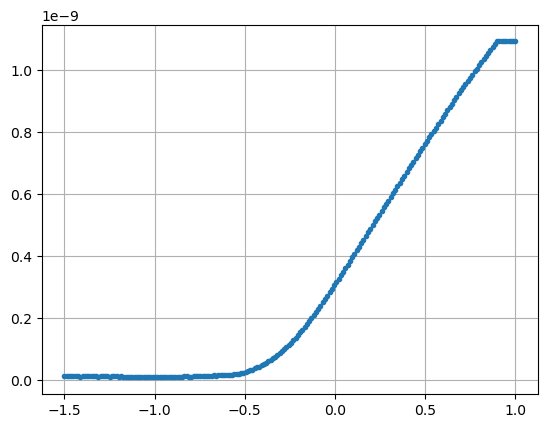

In [91]:
X = np.array(X)*(-1)
Y = np.array(Y)
R = np.array(R)
T = np.array(T)
V = np.array(V)

plt.figure()
plt.subplots()
plt.plot(V,R,'.')
plt.grid()



In [94]:
data.to_csv('Mediciones/barrido_voltaje_RT_550nm.csv', index=False)

# Barrido de longitud de onda

In [ ]:
X = []
Y = []
R = []
T = []
V = []

while True:
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)
    print(medicionXY)
    print(medicionRT)
    print('------------------')
    time.sleep(0.1)

    V.append(i)
    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])

In [ ]:
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'V':V,
                     'R':R,
                     'T':T})

display(data)

In [ ]:
X = np.array(X)*(-1)
Y = np.array(Y)
R = np.array(R)
T = np.array(T)
V = np.array(V)

plt.figure()
plt.subplots()
plt.plot(V,R,'.')
plt.grid()


In [ ]:
data.to_csv('Mediciones/barrido_longitud_.csv', index=False)